# Ebay Auto Sales

This dataset is a listing of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website. 

The dataset was originally scraped and uploaded to Kaggle. A few modifications have been made from the original dataset that was uploaded to Kaggle by the team at [dataquest.io](https://www.dataquest.io/):

- 50,000 data points have been sampled from the full dataset to ensure the code runs quickly in the hosted environment of [dataquest.io](https://www.dataquest.io/)
- The dataset has been dirtied a bit to more closely resemble what one would expect from a scraped dataset (the version uploaded to Kaggle was cleaned to be easier to work with)

The data dictionary provided with data is as follows:

- `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
- `name` - Name of the car.
- `seller` - Whether the seller is private or a dealer.
- `offerType` - The type of listing
- `price` - The price on the ad to sell the car.
- `abtest` - Whether the listing is included in an A/B test.
- `vehicleType` - The vehicle Type.
- `yearOfRegistration` - The year in which the car was first registered.
- `gearbox` - The transmission type.
- `powerPS` - The power of the car in PS.
- `model` - The car model name.
- `kilometer` - How many kilometers the car has driven.
- `monthOfRegistration` - The month in which the car was first registered.
- `fuelType` - What type of fuel the car uses.
- `brand` - The brand of the car.
- `notRepairedDamage` - If the car has a damage which is not yet repaired.
- `dateCreated` - The date on which the eBay listing was created.
- `nrOfPictures` - The number of pictures in the ad.
- `postalCode` - The postal code for the location of the vehicle.
- `lastSeenOnline` - When the crawler saw this ad last online.

We begin by importing the relevent libraries as well as loading our dataset `autos.csv`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

autos = pd.read_csv('autos.csv',encoding='Latin-1')

In [2]:
autos 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [3]:
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


If we are only interested in the names of the columns, we achieve them easily via: 

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
new_columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_PS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']
autos.columns = new_columns
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_PS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [6]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Edited column names so that they are now in [snakecase](https://www.wikiwand.com/en/Snake_case).

In [7]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 20:37:19,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


We should drop columns `nr_of_pictures` from our analysis since it doesn't offer any distinguishing features. Similarly `seller` and `unrepaired_damage` do not provide any insight into the data.

In [8]:
autos['price'] = autos['price'].str.replace('$','').str.replace(',','').astype('float')
autos['odometer'] = autos['odometer'].str.replace('km','').str.replace(',','').astype('float')
autos.rename(columns={'odometer': 'odometer_km'});
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [9]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [10]:
autos['price'].unique().shape

(2357,)

In [11]:
autos['price'].value_counts().head()

0.0       1421
500.0      781
1500.0     734
2500.0     643
1200.0     639
Name: price, dtype: int64

In [12]:
autos['price'].value_counts().sort_index()

0.0           1421
1.0            156
2.0              3
3.0              1
5.0              2
              ... 
10000000.0       1
11111111.0       2
12345678.0       3
27322222.0       1
99999999.0       1
Name: price, Length: 2357, dtype: int64

In [13]:
autos = autos[autos['price'].between(1,100000)]
autos['price'].value_counts().sort_index()

1.0        156
2.0          3
3.0          1
5.0          2
8.0          1
          ... 
93911.0      1
94999.0      1
98500.0      1
99000.0      2
99900.0      2
Name: price, Length: 2309, dtype: int64

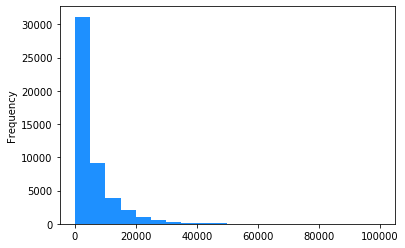

In [14]:
%matplotlib inline
fig,ax = plt.subplots()
autos['price'].plot.hist(bins=20,color = "dodgerblue")

The histogram for prices now seems reasonable after removing some outliers. We should now repeat the process for the `odometer_km` column. 

In [15]:
autos['registration_year'].describe()

count    48526.000000
mean      2004.754935
std         88.678603
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

Most registration years are between 1999 and 2008. Note that there are definitely erroneous values here with the minimum being 1000 and the maximum being 9999. 

In [16]:
100*autos['date_crawled'].str[:10].value_counts(normalize=True,dropna=False).sort_index()

2016-03-05    2.530602
2016-03-06    1.405432
2016-03-07    3.604253
2016-03-08    3.328113
2016-03-09    3.309566
2016-03-10    3.220954
2016-03-11    3.260108
2016-03-12    3.692866
2016-03-13    1.568231
2016-03-14    3.657833
2016-03-15    3.427029
2016-03-16    2.961299
2016-03-17    3.163253
2016-03-18    1.287969
2016-03-19    3.480608
2016-03-20    3.789721
2016-03-21    3.736141
2016-03-22    3.291019
2016-03-23    3.223014
2016-03-24    2.934509
2016-03-25    3.161192
2016-03-26    3.218893
2016-03-27    3.107612
2016-03-28    3.484730
2016-03-29    3.412604
2016-03-30    3.365206
2016-03-31    3.183860
2016-04-01    3.365206
2016-04-02    3.550674
2016-04-03    3.859787
2016-04-04    3.651651
2016-04-05    1.308577
2016-04-06    0.317356
2016-04-07    0.140131
Name: date_crawled, dtype: float64

All data was obtained basically in March 2016. 

In [17]:
100*autos['last_seen'].str[:10].value_counts(normalize=True,dropna=False).sort_index()

2016-03-05     0.107159
2016-03-06     0.432758
2016-03-07     0.539917
2016-03-08     0.741870
2016-03-09     0.958249
2016-03-10     1.067469
2016-03-11     1.238511
2016-03-12     2.380167
2016-03-13     0.890244
2016-03-14     1.261180
2016-03-15     1.588839
2016-03-16     1.644479
2016-03-17     2.810864
2016-03-18     0.733627
2016-03-19     1.584717
2016-03-20     2.064872
2016-03-21     2.062812
2016-03-22     2.139059
2016-03-23     1.852615
2016-03-24     1.974199
2016-03-25     1.922681
2016-03-26     1.675391
2016-03-27     1.564110
2016-03-28     2.085480
2016-03-29     2.235915
2016-03-30     2.479083
2016-03-31     2.380167
2016-04-01     2.281251
2016-04-02     2.491448
2016-04-03     2.520298
2016-04-04     2.450233
2016-04-05    12.463422
2016-04-06    22.183984
2016-04-07    13.192928
Name: last_seen, dtype: float64

Most cars were last seen during the most recent dates. 

In [18]:
100*autos['ad_created'].str[:10].value_counts(normalize=True,dropna=False).sort_index()

2015-06-11    0.002061
2015-08-10    0.002061
2015-09-09    0.002061
2015-11-10    0.002061
2015-12-05    0.002061
                ...   
2016-04-03    3.884516
2016-04-04    3.688744
2016-04-05    1.180810
2016-04-06    0.325599
2016-04-07    0.125706
Name: ad_created, Length: 76, dtype: float64

Much greater span for when adds were created. 

In [19]:
autos['registration_year'].value_counts().sort_index()

1000    1
1001    1
1111    1
1800    2
1910    5
       ..
5911    1
6200    1
8888    1
9000    1
9999    3
Name: registration_year, Length: 95, dtype: int64

From `value_counts()` we see that outliers exist for dates > 2800 and < 1800.

In [20]:
autos = autos[autos['registration_year'].between(1801,2700)]
autos['registration_year'].value_counts(normalize=True).sort_index()

1910    0.000103
1927    0.000021
1929    0.000021
1931    0.000021
1934    0.000041
          ...   
2015    0.007999
2016    0.025028
2017    0.028697
2018    0.009690
2019    0.000041
Name: registration_year, Length: 81, dtype: float64

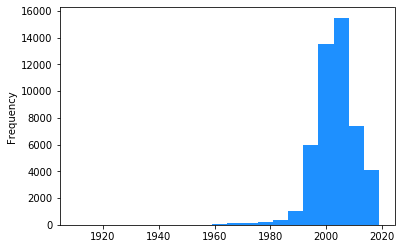

In [21]:
%matplotlib inline
fig,ax = plt.subplots()
autos['registration_year'].plot.hist(bins=20,color = "dodgerblue")

In [22]:
autos['brand'].value_counts(normalize=True)*100

volkswagen        21.298396
opel              10.872882
bmw               10.866697
mercedes_benz      9.580258
audi               8.590690
ford               6.970272
renault            4.793221
peugeot            2.948089
fiat               2.601740
seat               1.894611
skoda              1.608048
nissan             1.527646
mazda              1.523523
smart              1.430751
citroen            1.412196
toyota             1.259638
hyundai            0.995753
sonstige_autos     0.954521
volvo              0.905043
mini               0.861749
mitsubishi         0.818455
honda              0.799901
kia                0.711252
alfa_romeo         0.661774
suzuki             0.589618
chevrolet          0.566940
porsche            0.538078
chrysler           0.348411
dacia              0.265946
daihatsu           0.251515
jeep               0.220591
subaru             0.210283
land_rover         0.204098
saab               0.162866
daewoo             0.156682
jaguar             0

Let's focus on brands that have > 5% of the share of the listings. Recall `dtype` stands for "data type" in Pandas.

In [23]:
brand_counts = autos["brand"].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

Index(['volkswagen', 'opel', 'bmw', 'mercedes_benz', 'audi', 'ford'], dtype='object')


Can use the `index` method to return the names of the common brands (i.e. grabbing the index labels from the series produced by value_counts). 

In [24]:
brand_mean_prices = {}
brand_mean_mileage = {}
for brand in common_brands:
    brand_only = autos[autos["brand"]== brand] # new data frame
    
    mean_price = brand_only["price"].mean()
    mean_mileage = brand_only["odometer"].mean()
    
    brand_mean_prices[brand] = int(mean_price)
    brand_mean_mileage[brand] = int(mean_mileage)
    
bmp_series = pd.Series(brand_mean_prices)
bmm_series = pd.Series(brand_mean_mileage)

df = pd.DataFrame(bmp_series, columns=['mean_price'])
df['mean_mileage'] = bmm_series
df
print(df)


               mean_price  mean_mileage
volkswagen           5333        128955
opel                 2941        129452
bmw                  8133        132742
mercedes_benz        8430        130909
audi                 9173        129522
ford                 3691        124371


* opel and ford are relatively cheap 
* volkswagen is medium cost
* bmw, audi, and mercedes_benz are all pretty expensive, with a mean price exceeding $8000
* Seems that all cards have about the same (130k) mileage, except for ford which has the least. 